Linear regression is a process of using historical data to determine a best fitting straight line between the data points and use it to forecast future values.

In [18]:
# Fundamental libraries for data science/analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


The data we are going to use oceanographic data from California. It is a popular dataset found on kaggle here - https://www.kaggle.com/datasets/sohier/calcofi and has a number of attributes, though we will only be interested in the water temperature and salinity attributes.

In [6]:
# the data is in the datasets folder
datasets = '../datasets/'

# Read the data
df = pd.read_csv(datasets + 'bottle.csv')

df.head()

/var/folders/m6/zwh5tvjs2szd7l5xrt_rp8c00000gn/T/ipykernel_74095/4204216258.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datasets/bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Preparation

We are going to reduce the data down to the 2 attributes required. Then clean the data, dealing with null values etc.

In [10]:
salinity_temp_df = df[['Salnty', 'T_degC']]

In [14]:
# basic statistics

salinity_temp_df.info()
salinity_temp_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  817509 non-null  float64
 1   T_degC  853900 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


,Salnty,T_degC
count,817509.000000,853900.000000
mean,33.840350,10.799677
std,0.461843,4.243825
min,28.431000,1.440000
25%,33.488000,7.680000
50%,33.863000,10.060000
75%,34.196900,13.880000
max,37.034000,31.140000


In [16]:
# drop rows with missing values
salinity_temp_df = salinity_temp_df.dropna(axis=0, how='any')

# Check the data again to ensure we have a clean dataset
salinity_temp_df.info()
salinity_temp_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  814247 non-null  float64
 1   T_degC  814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


,Salnty,T_degC
count,814247.000000,814247.000000
mean,33.841337,10.860287
std,0.461636,4.224930
min,28.431000,1.440000
25%,33.489000,7.750000
50%,33.866000,10.110000
75%,34.197000,13.930000
max,37.034000,31.140000


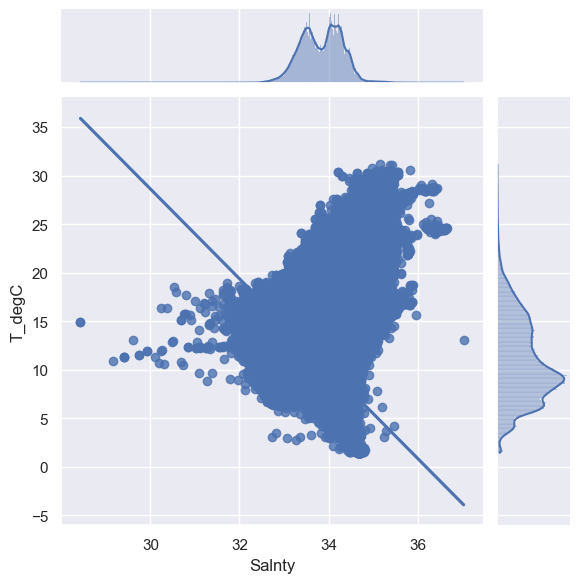

In [17]:
# Plot the data
sns.set(style="darkgrid")
sns.jointplot(x="Salnty", y="T_degC", data=salinity_temp_df, kind="reg")   
plt.show()

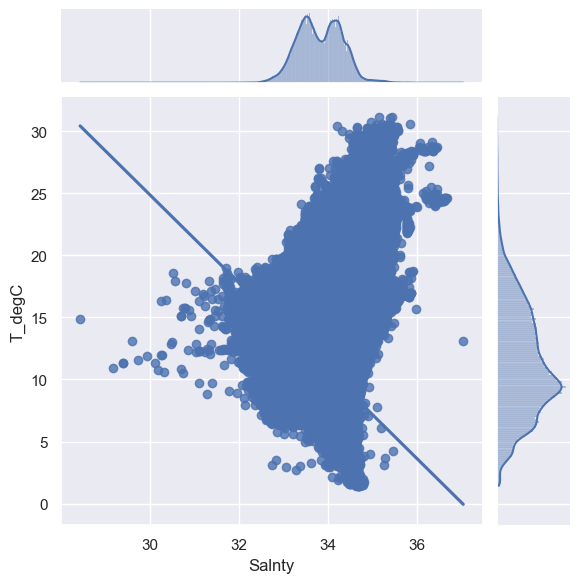

In [20]:
# plotting the data allows us to see the relationship between the two variables, though this is unclear as there seems to be a number of duplicate values

# We can drop duplicates to see if this improves the relationship
salinity_temp_df = salinity_temp_df.drop_duplicates(subset = ["Salnty", "T_degC"])

# Plot the data again
sns.jointplot(x="Salnty", y="T_degC", data=salinity_temp_df, kind="reg")
plt.show()

The result of dropping NA and deduping the data has allowed for more clear information and a complete dataset. Let's prepare the data for modelling now.

In [22]:
# turn the independent and dependent variables into numpy arrays
X = salinity_temp_df['Salnty'].values.reshape(-1,1)
y = salinity_temp_df['T_degC'].values.reshape(-1,1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# initialize the model
lr = LinearRegression()
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)

In [24]:
print("Test score: {0:.2f} %".format(100 * test_score))

Test score: 16.25 %


This is not a great score at all. Meaning that our data may not be suitable for linear regression in this case.

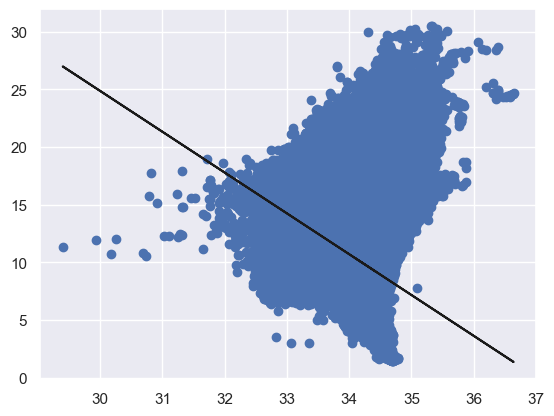

In [27]:
y_pred = lr.predict(X_test)

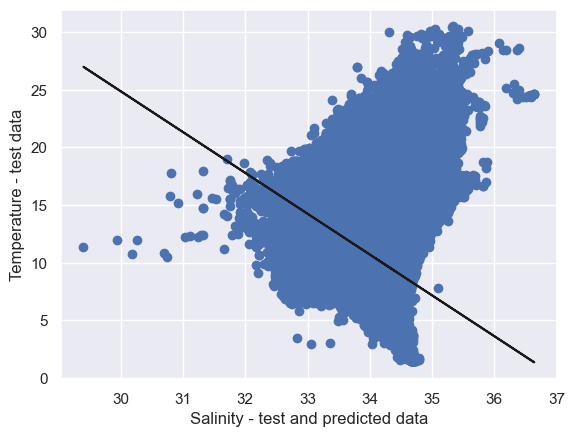

In [31]:
plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.xlabel("Salinity - test and predicted data")
plt.ylabel("Temperature - test data")
plt.show()

In [28]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

15.721990411928337
0.16248430404796166


As a thought exercise, let's look at the mean temperature for each value of salinity, and see if we could model that relationship.

In [32]:
# let's group the data by salinity and take the mean of the temperature
agg_salinity_temp_df = salinity_temp_df.groupby('Salnty').mean()

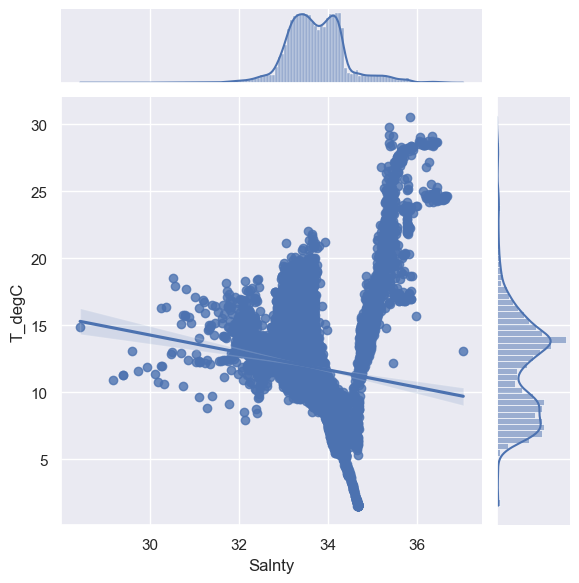

In [33]:
# plot the aggregated data with a regression line
sns.jointplot(x="Salnty", y="T_degC", data=agg_salinity_temp_df, kind="reg")
plt.show()

Having this result where a model will not work is common in data science. For linear regression, we could have performed some tests on the data first to assess the correlation of the data and the strength of the correlation which would have enabled us to see, possibly more quickly, that linear regression is not going to work.

We had a hypothesis that Salinity and Temperature had a relationship and Salinity could be used to predict/forecast the temperature of the water. Therefore H0 would be that temperature and salinity have no correlation.

We did a binomial regression with the data, however we should explore this dataset further, taking a look at trends over time etc. Maybe we can find a way to shape or slice the data which will allow for linear regression, binomial or polynomial.



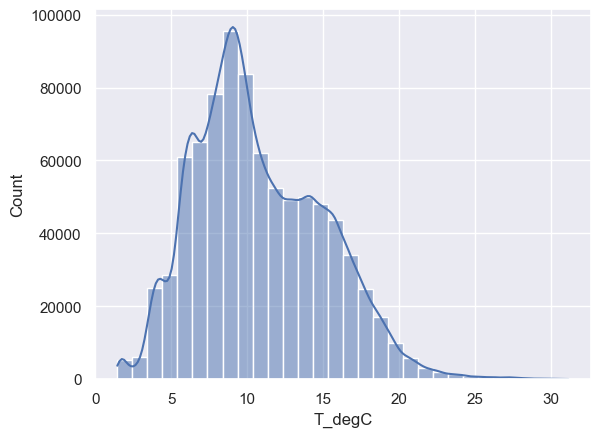

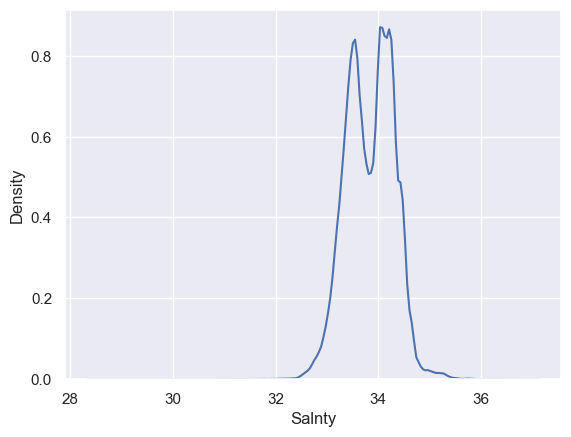

In [34]:
# KDE plots are useful when we do not really know the underlying distribution of the data
# We are going back to the original data and will plot salinity, temperature and 02 saturation

sns.histplot(data=df, x="T_degC", bins=30, kde=True)
plt.show()

sns.kdeplot(data=df, x="Salnty")
plt.show()

sns.histplot(data=df, x="O2ml_L", bins=30, kde=True)
plt.show()